In [1]:
import pandas as pd

# Load the dataset
file_path = 'merged_lz_houston_data.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data_head = data.head()

# Getting basic information about the dataset
data_info = data.info()

# Summary statistics for numerical columns
data_description = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

data_head, data_info, data_description, missing_values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17468 entries, 0 to 17467
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Delivery Date_x         17464 non-null  object 
 1   Hour Ending             17464 non-null  float64
 2   Settlement Point Price  17464 non-null  float64
 3   Month                   17464 non-null  object 
 4   DateTime                17468 non-null  object 
 5   ACCOUNT_NUMBER          17418 non-null  object 
 6   LOCAL_FROM_DATETIME     17418 non-null  object 
 7   QUANTITY                17418 non-null  float64
 8   UNIT_OF_MEASURE         17418 non-null  object 
 9   Delivery Date_y         17418 non-null  object 
 10  Hour                    17418 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.5+ MB


(  Delivery Date_x  Hour Ending  Settlement Point Price Month  \
 0      2023-01-01          1.0                   10.36   Jan   
 1      2023-01-01          1.0                   10.36   Jan   
 2      2023-01-01          2.0                    9.84   Jan   
 3      2023-01-01          2.0                    9.84   Jan   
 4      2023-01-01          3.0                    8.58   Jan   
 
               DateTime ACCOUNT_NUMBER        LOCAL_FROM_DATETIME   QUANTITY  \
 0  2023-01-01 01:00:00      account_a  2023-01-01 01:00:00+00:00    1.75950   
 1  2023-01-01 01:00:00      account_b  2023-01-01 01:00:00+00:00  197.89200   
 2  2023-01-01 02:00:00      account_a  2023-01-01 02:00:00+00:00    3.67425   
 3  2023-01-01 02:00:00      account_b  2023-01-01 02:00:00+00:00  192.37200   
 4  2023-01-01 03:00:00      account_a  2023-01-01 03:00:00+00:00    3.55350   
 
   UNIT_OF_MEASURE Delivery Date_y  Hour  
 0             kWh      2023-01-01   1.0  
 1             kWh      2023-01-01   1.0

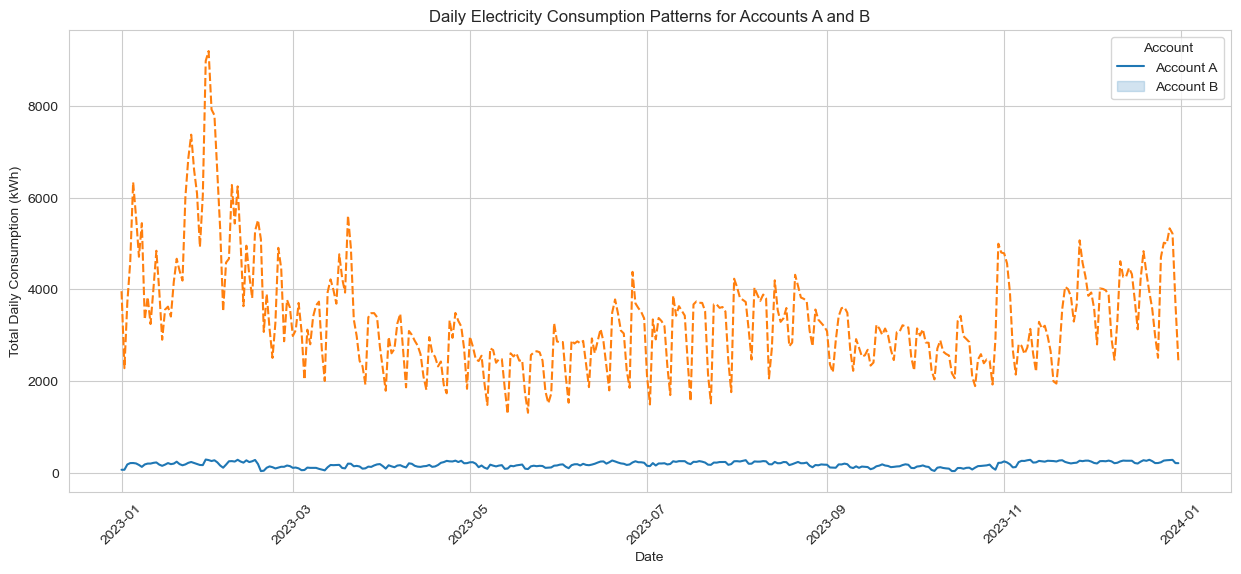

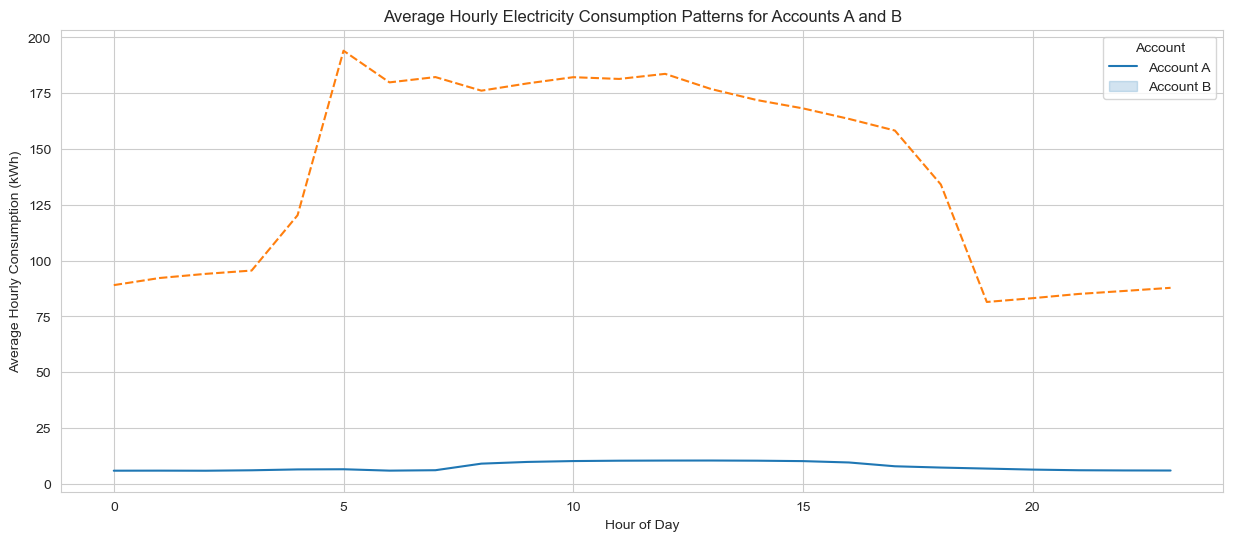

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper datetime format for relevant columns
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['LOCAL_FROM_DATETIME'] = pd.to_datetime(data['LOCAL_FROM_DATETIME'])

# Aggregate data to visualize daily consumption patterns for both accounts
daily_consumption = data.groupby([data['DateTime'].dt.date, 'ACCOUNT_NUMBER'])['QUANTITY'].sum().unstack()

# Plotting daily consumption patterns
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_consumption)
plt.title('Daily Electricity Consumption Patterns for Accounts A and B')
plt.xlabel('Date')
plt.ylabel('Total Daily Consumption (kWh)')
plt.xticks(rotation=45)
plt.legend(title='Account', labels=['Account A', 'Account B'])
plt.show()

# Aggregate data to visualize hourly consumption patterns
hourly_consumption = data.groupby([data['DateTime'].dt.hour, 'ACCOUNT_NUMBER'])['QUANTITY'].mean().unstack()

# Plotting hourly consumption patterns
plt.figure(figsize=(15, 6))
sns.lineplot(data=hourly_consumption)
plt.title('Average Hourly Electricity Consumption Patterns for Accounts A and B')
plt.xlabel('Hour of Day')
plt.ylabel('Average Hourly Consumption (kWh)')
plt.legend(title='Account', labels=['Account A', 'Account B'])
plt.show()

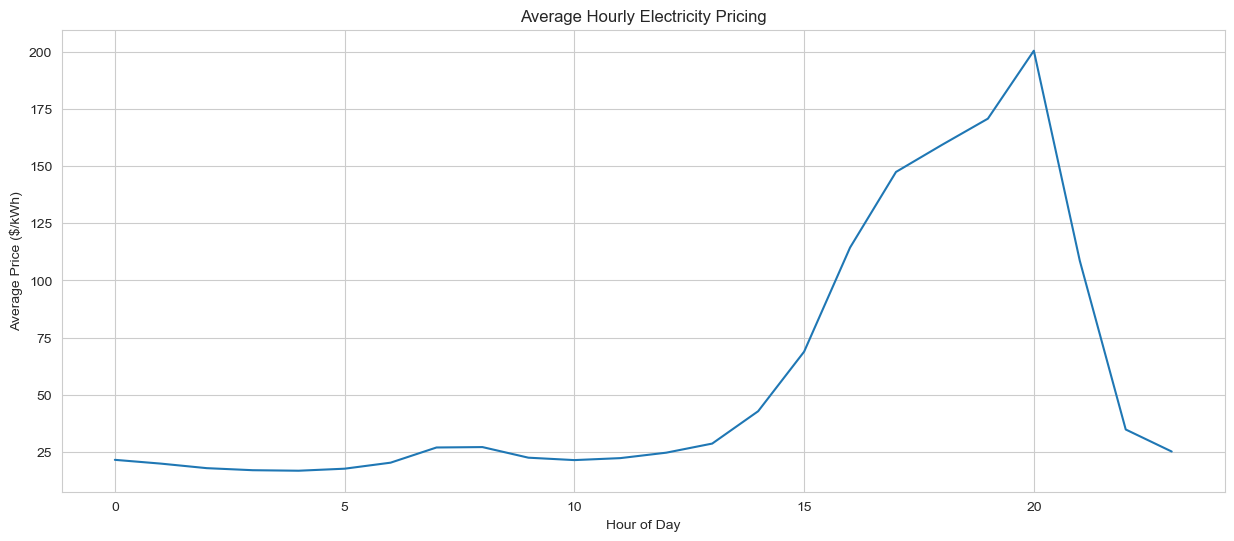

In [3]:
# Aggregate data to visualize hourly electricity pricing
hourly_pricing = data.groupby(data['DateTime'].dt.hour)['Settlement Point Price'].mean()

# Plotting hourly electricity pricing
plt.figure(figsize=(15, 6))
sns.lineplot(data=hourly_pricing)
plt.title('Average Hourly Electricity Pricing')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price ($/kWh)')
plt.show()

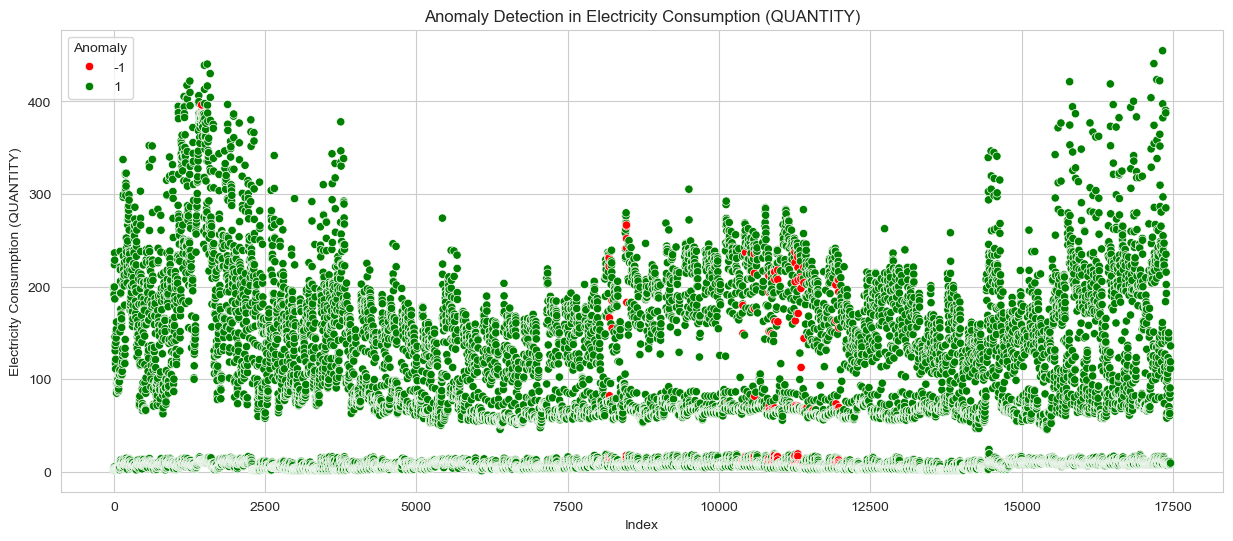

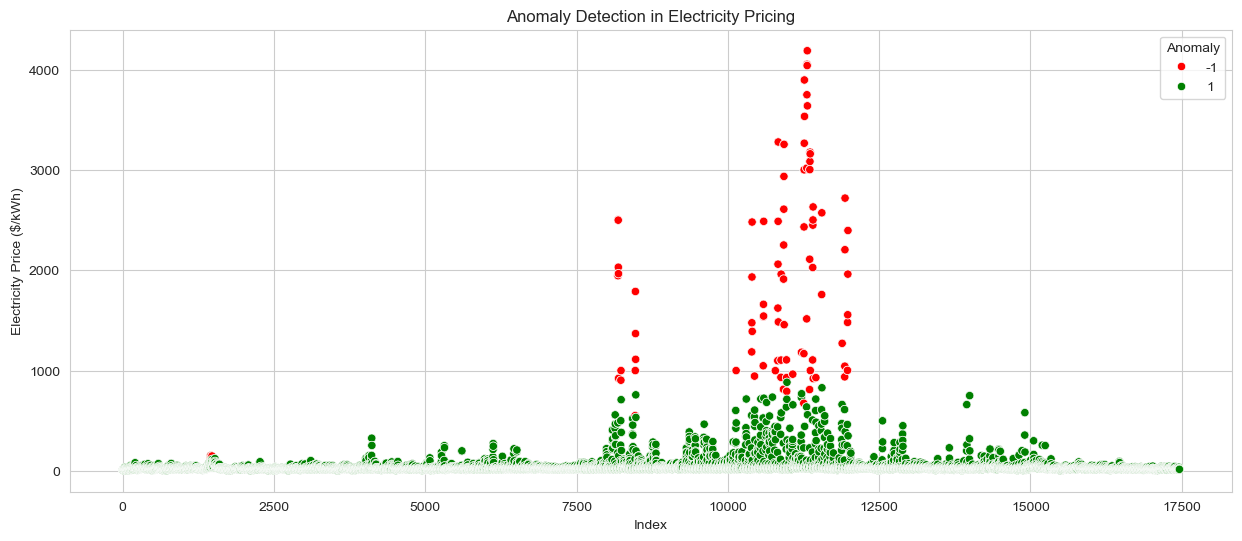

In [4]:
from sklearn.ensemble import IsolationForest

# Re-defining features for anomaly detection due to previous error
features = data[['QUANTITY', 'Settlement Point Price']].dropna()

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(features)

# Predicting anomalies (-1 for anomalies, 1 for normal)
anomalies = iso_forest.predict(features)

# Adding anomaly predictions to the dataset
features['Anomaly'] = anomalies

# Visualizing anomalies in QUANTITY
plt.figure(figsize=(15, 6))
sns.scatterplot(x=features.index, y='QUANTITY', hue='Anomaly', data=features, palette={-1:'r', 1:'g'}, legend='full')
plt.title('Anomaly Detection in Electricity Consumption (QUANTITY)')
plt.xlabel('Index')
plt.ylabel('Electricity Consumption (QUANTITY)')
plt.show()

# Visualizing anomalies in Settlement Point Price
plt.figure(figsize=(15, 6))
sns.scatterplot(x=features.index, y='Settlement Point Price', hue='Anomaly', data=features, palette={-1:'r', 1:'g'}, legend='full')
plt.title('Anomaly Detection in Electricity Pricing')
plt.xlabel('Index')
plt.ylabel('Electricity Price ($/kWh)')
plt.show()

In [5]:
# List of anomalies with their date and time
anomalies_list = data.loc[features[features['Anomaly'] == -1].index, ['DateTime', 'QUANTITY', 'Settlement Point Price']]
anomalies_list

,DateTime,QUANTITY,Settlement Point Price
1453,2023-01-31 07:00:00,396.26700,118.41
1455,2023-01-31 08:00:00,387.02100,151.19
1457,2023-01-31 09:00:00,386.74500,127.89
1477,2023-01-31 19:00:00,384.88200,148.18
8184,2023-06-20 16:00:00,14.71425,1945.64
...,...,...,...
11981,2023-09-08 18:00:00,155.38800,1556.22
11982,2023-09-08 19:00:00,7.10700,1961.32
11983,2023-09-08 19:00:00,69.48300,1961.32
11984,2023-09-08 20:00:00,5.38200,2396.14


/Users/hzs/opt/anaconda3/envs/STAT4911_IGSEnergy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


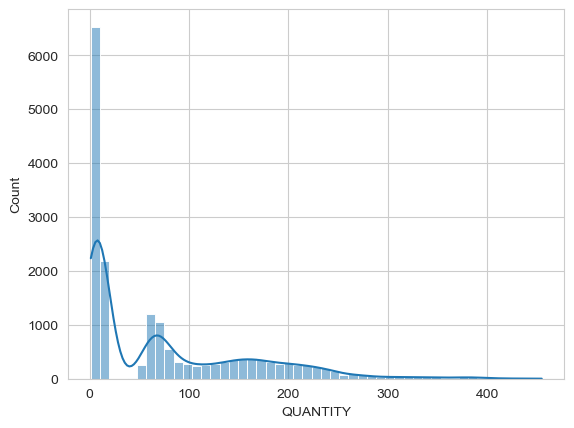

ShapiroResult(statistic=0.8174517154693604, pvalue=2.1253223873478535e-23)

In [9]:
data['Settlement Point Price'] = pd.to_numeric(data['Settlement Point Price'], errors='coerce')
data['QUANTITY'] = pd.to_numeric(data['QUANTITY'], errors='coerce')
data = data.dropna(subset=['Settlement Point Price', 'QUANTITY'])

summary_statistics = data.describe()
from scipy.stats import skew, kurtosis

data_skewness = skew(data['QUANTITY'])
data_kurtosis = kurtosis(data['QUANTITY'])
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['QUANTITY'], kde=True)
plt.show()
from scipy import stats

shapiro_test = stats.shapiro(data['QUANTITY'].sample(500))  # Sampling due to test limitations
shapiro_test

## LSTM Model for Time Series Forecasting
Using LSTM (Long Short-Term Memory) networks to optimize battery efficiency in the context of historical price and quantity data involves forecasting future prices and demand, then making decisions on when to charge or discharge the battery. The goal is often to minimize costs or maximize profits while ensuring the battery's longevity and meeting operational constraints. Here's a step-by-step approach on how you could set up such a system:

### 1. Data Collection and Preprocessing
- **Collect Data:** Gather historical data on electricity prices, battery charge/discharge rates, and any relevant factors that could influence prices or battery efficiency, such as weather conditions or demand fluctuations.
- **Feature Engineering:** Create features that the LSTM can use to understand patterns in the data. This might include time of day, day of the week, seasonal indicators, and lag features that show prices and quantities in previous time steps.
- **Normalization:** Normalize the data to ensure that all input features have a similar scale, improving the LSTM's convergence during training.

### 2. Model Design
- **LSTM Architecture:** Design an LSTM network that takes the engineered features as input. The network might have multiple LSTM layers to capture complex patterns and dependencies in the data.
- **Output Layer:** The output layer should be designed based on the specific optimization goals. For price forecasting, it could directly predict future prices. For battery operation decisions, it might predict future demand or price categories (e.g., high, medium, low) to guide charging and discharging actions.
- **Loss Function:** Choose a loss function that aligns with the optimization objectives, such as Mean Squared Error (MSE) for forecasting tasks or a custom loss function that incorporates battery health and operational constraints.

### 3. Training the Model
- **Split the Data:** Divide the dataset into training, validation, and test sets to evaluate the model's performance and avoid overfitting.
- **Train the LSTM:** Train the LSTM model using the training set, adjusting hyperparameters (e.g., learning rate, number of epochs, batch size) based on performance on the validation set.

### 4. Strategy Implementation
- **Forecasting:** Use the trained LSTM model to forecast future prices or demand. The forecast horizon should align with the operational planning needs (e.g., next 24 hours, next week).
- **Decision Algorithms:** Develop algorithms that use these forecasts to make optimal decisions about when to charge or discharge the battery. These decisions should consider factors like forecasted prices, battery capacity, charge/discharge rates, and any operational constraints.
- **Optimization:** Implement optimization techniques (e.g., dynamic programming, linear programming) if the decision algorithm needs to solve complex problems that involve multiple objectives or constraints.

### 5. Evaluation and Adjustment
- **Backtesting:** Evaluate the strategy's performance by backtesting it against historical data. Analyze the decisions made by the model and their impact on costs, profits, and battery health.
- **Continuous Learning:** Set up a mechanism for the model to learn continuously from new data and adjust the forecasts and decision-making strategy as market conditions change.

### 6. Operational Integration
- **Integration:** Integrate the LSTM-based system with battery management systems and market data feeds to enable real-time or near-real-time decision-making.
- **Monitoring:** Implement monitoring tools to track the system's performance, battery health, and any deviations from expected outcomes.

This approach requires a careful balance between maximizing economic benefits and ensuring the battery's longevity and efficiency. Continuous evaluation and adjustment of the model and strategy are essential as new data becomes available and market conditions evolve.

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
data = pd.read_csv('merged_lz_houston_data.csv')

# Feature Engineering - creating time-based features
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['hour'] = data['DateTime'].dt.hour
data['day_of_week'] = data['DateTime'].dt.dayofweek

# Assuming the actual column names for price and quantity in your dataset are 'Settlement Point Price' and 'QUANTITY'
# If they are different, replace them with the correct ones
price_column = 'Settlement Point Price'  # Replace with the actual column name for price
quantity_column = 'QUANTITY'  # Replace with the actual column name for quantity

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[[price_column, quantity_column, 'hour', 'day_of_week']])
scaled_data

array([[0.00208299, 0.00148261, 0.04347826, 1.        ],
       [0.00208299, 0.43371983, 0.04347826, 1.        ],
       [0.00195878, 0.00570234, 0.08695652, 1.        ],
       ...,
       [       nan, 0.40817335, 0.        , 1.        ],
       [       nan, 0.0022049 , 0.13043478, 1.        ],
       [       nan, 0.19391751, 0.13043478, 1.        ]])